Ось **розгорнутий контент для файлу `07_projects.ipynb`**, який містить **реальні аналітичні задачі для закріплення знань** у сфері **інформаційно-аналітичного забезпечення військових штабів** з використанням Python.

---

# 📘 `07_projects.ipynb`

## **Тема: Приклади аналітичних завдань і мініпроєктів**

---

### 🔹 Вступ

У цьому файлі подано серію прикладних завдань і мініпроєктів, які дозволяють практично застосувати здобуті знання Python, Pandas, Matplotlib та файлових операцій у реальних умовах роботи військових аналітиків.

---

## 🔸 ✅ Проєкт 1: Аналіз оперативної обстановки на основі CSV

### 🔹 Вхідні дані:

`losses.csv` — файл зі щоденними втратами:

```csv
Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
...
```

### 🔹 Завдання:

1. Визначити сумарні втрати по кожному напрямку.
2. Побудувати графік динаміки втрат.
3. Виділити найнебезпечніші напрямки за останні 3 дні.
4. Експортувати аналіз у файл `summary.csv`.

---

## 🔸 ✅ Проєкт 2: Побудова ситуаційного графіка

### 🔹 Завдання:

1. Завантажити бойові донесення (`reports.txt`).
2. Витягти дати, напрямки, втрати за допомогою простого парсингу.
3. Побудувати графік змін бойової ситуації.
4. Вивести повідомлення, якщо втрати на одному напрямку перевищують 150 осіб.

---

## 🔸 ✅ Проєкт 3: Генерація аналітичної довідки

### 🔹 Вихід:

* Автоматичне створення `summary_report.txt` на основі обробленого CSV-файлу з висновками:

#### ▶️ Приклад:

```
✅ Напрямок з найвищими втратами: Схід (580 осіб)
✅ Найбільш залучений підрозділ: 1-а мехбр
✅ Динаміка втрат: зростання протягом 3 останніх днів
✅ Рекомендація: посилити угруповання на східному напрямку
```

---

## 🔸 ✅ Проєкт 4: Система фільтрації бойових подій

### 🔹 Вхідні дані:

* Список подій у форматі JSON або CSV
* Поля: дата, напрям, тип події, втрати, підрозділ

### 🔹 Завдання:

* Створити фільтр подій за напрямком та типом (наступ, артобстріл)
* Порахувати середні втрати по типу подій
* Побудувати порівняльний графік (artillery vs assault)

---

## 🔸 ✅ Проєкт 5 (просунутий): Комбінована панель звітності

1. Завантаження кількох звітів
2. Групування та обчислення статистик
3. Побудова декількох графіків
4. Генерація HTML-звіту або `.docx` через шаблон

---

## 📝 Загальні інструкції до проєктів:

* Рекомендується зберігати всі проєкти в окремих підпапках.
* Вхідні файли повинні бути збережені у форматі `.csv`, `.txt`, `.json`.
* Можна додати інтерфейс командного рядка для зручного запуску аналізу.
* Кожен проєкт має містити:

  * `README.md` (опис цілей)
  * `analyze.py` або `project.ipynb`
  * приклад вихідного звіту

---

### ✅ Порада

Для кожного проєкту бажано створювати структуру:

```
project_folder/
├── data/
├── output/
├── project.ipynb
└── README.md
```



## Проект 1

Сумарні втрати по напрямках:
          Особовий склад  Техніка  Боєприпаси
Напрямок                                     
Південь               18        3          11
Північ                 5        2           1
Схід                   7        1           4


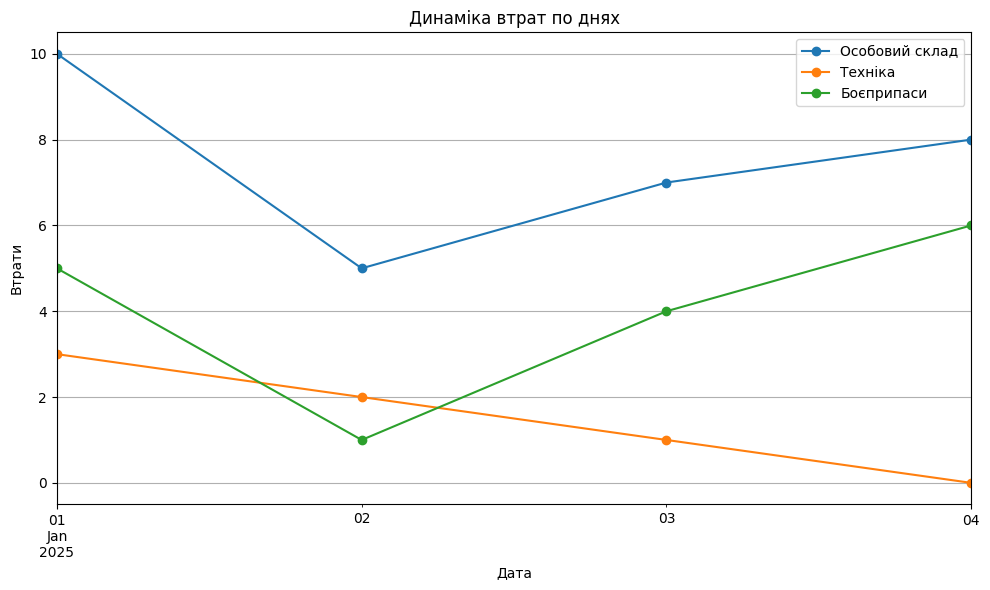


Найнебезпечніші напрямки за останні 3 дні:
          Особовий склад  Техніка  Боєприпаси  Сумарні втрати
Напрямок                                                     
Південь                8        0           6              14
Схід                   7        1           4              12
Північ                 5        2           1               8

✅ Дані збережено у 'summary.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')

if 'Дата' not in df.columns:
    df['Дата'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

summary_by_direction = df.groupby('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()
print("Сумарні втрати по напрямках:")
print(summary_by_direction)

daily_losses = df.groupby('Дата')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()

daily_losses.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Динаміка втрат по днях')
plt.xlabel('Дата')
plt.ylabel('Втрати')
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses_trend.png', dpi=300)
plt.show()

last_3_days = df[df['Дата'] >= df['Дата'].max() - pd.Timedelta(days=2)]


dangerous_directions = last_3_days.groupby('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']].sum()


dangerous_directions['Сумарні втрати'] = dangerous_directions.sum(axis=1)
dangerous_sorted = dangerous_directions.sort_values('Сумарні втрати', ascending=False)

print("\nНайнебезпечніші напрямки за останні 3 дні:")
print(dangerous_sorted)

export_df = summary_by_direction.copy()
export_df['Сумарно'] = export_df.sum(axis=1)
export_df.to_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\summary.csv', encoding='utf-8-sig')
print("\n✅ Дані збережено у 'summary.csv'")




## Проект 2

📋 Витягнуті дані:
        Дата Напрямок  Особовий склад  Техніка  Боєприпаси
0 2025-06-30  Південь              80        3           4
1 2025-06-30   Північ              25        1           2
2 2025-06-30     Схід              60        4           5
3 2025-06-30    Захід              10        0           1


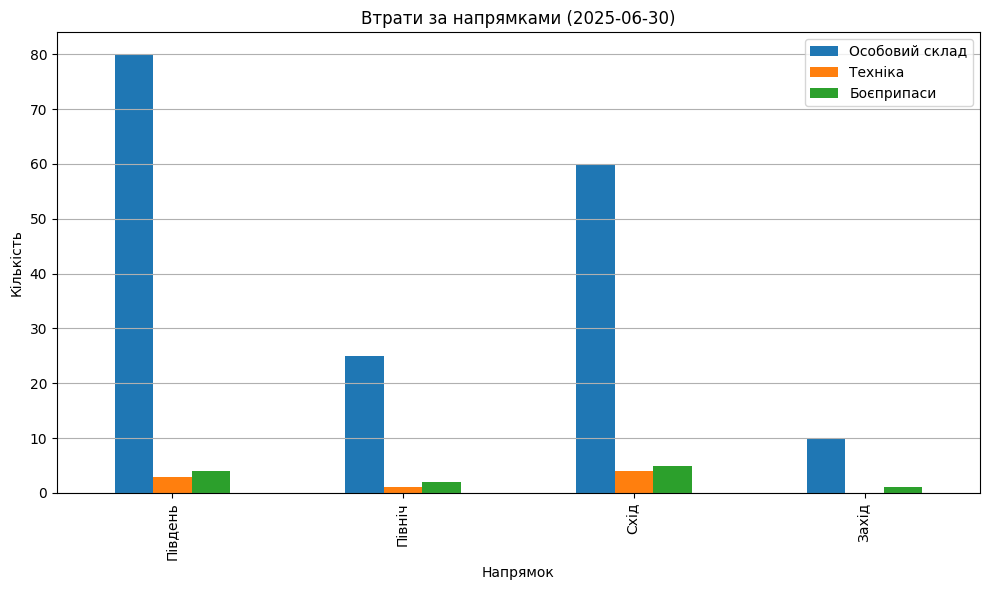

✅ Втрати на жодному напрямку не перевищують 150 осіб.


In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

text = """
Бойове донесення

Дата: 2025-06-30

Напрямок: Південь
Втрати:
 - Особовий склад: 80 осіб
 - Техніка: 3 одиниці
 - Боєприпаси: 4 одиниці

Напрямок: Північ
Втрати:
 - Особовий склад: 25 осіб
 - Техніка: 1 одиниця
 - Боєприпаси: 2 одиниці

Напрямок: Схід
Втрати:
 - Особовий склад: 60 осіб
 - Техніка: 4 одиниці
 - Боєприпаси: 5 одиниць

Напрямок: Захід
Втрати:
 - Особовий склад: 10 осіб
 - Техніка: 0 одиниць
 - Боєприпаси: 1 одиниця
"""


date_match = re.search(r'Дата:\s*(\d{4}-\d{2}-\d{2})', text)
report_date = pd.to_datetime(date_match.group(1)) if date_match else None


pattern = r'Напрямок:\s*(.*?)\s+Втрати:\s+- Особовий склад: (\d+).*?осіб\s+- Техніка: (\d+).*?\s+- Боєприпаси: (\d+)'
matches = re.findall(pattern, text, re.DOTALL)


data = []
for match in matches:
    direction, personnel, tech, ammo = match
    data.append({
        'Дата': report_date,
        'Напрямок': direction.strip(),
        'Особовий склад': int(personnel),
        'Техніка': int(tech),
        'Боєприпаси': int(ammo)
    })


df = pd.DataFrame(data)

print("📋 Витягнуті дані:")
print(df)


df_plot = df.set_index('Напрямок')[['Особовий склад', 'Техніка', 'Боєприпаси']]
df_plot.plot(kind='bar', figsize=(10, 6))
plt.title(f'Втрати за напрямками ({report_date.date()})')
plt.ylabel('Кількість')
plt.xlabel('Напрямок')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


high_loss = df[df['Особовий склад'] > 150]
if not high_loss.empty:
    print("⚠️ Попередження: втрати перевищують 150 осіб на таких напрямках:")
    print(high_loss[['Напрямок', 'Особовий склад']])
else:
    print("✅ Втрати на жодному напрямку не перевищують 150 осіб.")

## Проект 3

In [4]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv(r'C:\Users\5103_1\Documents\5103-1\Sample1\losses.csv.txt', encoding='utf-8')

# 2. Перетворення дат
df['Дата'] = pd.to_datetime(df['Дата'])

# 3. Визначення напрямку з найбільшими втратами особового складу
direction_losses = df.groupby('Напрямок')['Особовий склад'].sum()
top_direction = direction_losses.idxmax()
top_direction_value = direction_losses.max()

# 4. Найбільш залучений підрозділ (за сумою втрат)
top_unit = df.groupby('Підрозділ')['Особовий склад'].sum().idxmax()

# 5. Динаміка за останні 3 дні
last_dates = df['Дата'].sort_values().unique()[-3:]
last3 = df[df['Дата'].isin(last_dates)].groupby('Дата')['Особовий склад'].sum()

if last3.is_monotonic_increasing:
    trend = "зростання протягом 3 останніх днів"
elif last3.is_monotonic_decreasing:
    trend = "зниження протягом 3 останніх днів"
else:
    trend = "нестабільна (коливання) протягом 3 останніх днів"

# 6. Рекомендація
recommendation = f"посилити угруповання на {top_direction.lower()} напрямку"

# 7. Генерація тексту звіту
report_lines = [
    f"✅ Напрямок з найвищими втратами: {top_direction} ({top_direction_value} осіб)",
    f"✅ Найбільш залучений підрозділ: {top_unit}",
    f"✅ Динаміка втрат: {trend}",
    f"✅ Рекомендація: {recommendation}"
]

# 8. Збереження у файл
report_path = r'C:\Users\5103_1\Documents\5103-1\Sample1\summary_report.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write('\n'.join(report_lines))

print("📄 Аналітична довідка збережена у:", report_path)

KeyError: 'Дата'